    
# DATA DAY TRAINING: Intro to Python

## Exploring the Better Life Index (OECD) and GDP Per Capita (IMF WEO)



## Data Source:

For this notebook, we downloaded the Better Life Index data for 2016 (BLI2016.csv) from the OECD Better Life Index Page(https://stats.oecd.org/Index.aspx?DataSetCode=BLI) and the GDP per capita data for 2016 from the IMF's World Economic Outlook (http://homl.info/5). Data definitions available at the end of this notebook.

# Importing libraries

In [68]:
import xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pylab
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression

# Read data into a python dataframe (life satisfaction)

In [69]:
# set the path to the OECD dataset with data from 2015 on life satisfaction and time spent on leisure+personal care
PATH1 = '/Users/dharanarijal/Desktop/OECDY/BLI2015.csv'

In [70]:
# read csv file into a dataframe
df1 = pd.read_csv(PATH1)

In [71]:
#Shape of the dataframe: (# of observations, #of columns)
df1.shape

(3292, 17)

In [72]:
#names of all columns
print(df1.columns)

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')


In [74]:
#first five observations
df1.head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.0,NaN,NaN


In [75]:
# creating a dataframe with only the columns needed
df1=df1[['LOCATION','Country','INDICATOR','Inequality','Unit','Value']]

In [76]:
# first five observations for this new dataframe
df1.head()

,LOCATION,Country,INDICATOR,Inequality,Unit,Value
0,AUS,Australia,HO_BASE,Total,Percentage,1.1
1,AUT,Austria,HO_BASE,Total,Percentage,1.0
2,BEL,Belgium,HO_BASE,Total,Percentage,2.0
3,CAN,Canada,HO_BASE,Total,Percentage,0.2
4,CZE,Czech Republic,HO_BASE,Total,Percentage,0.9


In [77]:
#renaming all columns so they're lowercase
df1.rename(columns={'LOCATION':'location', 'Country':'country', 'INDICATOR':'indicator','Inequality':'inequality','Unit':'unit', 'Value':'value'}, 
                 inplace=True)

In [78]:
# subsetting dataframe with only those observations that have the indicator SW_LIFS for life satisfaction index
df1_sat=df1.loc[df1['indicator'] == "SW_LIFS"]

In [79]:
# first five observations in this dataframe
df1_sat.head()

,location,country,indicator,inequality,unit,value
2669,AUS,Australia,SW_LIFS,Total,Average score,7.3
2670,AUT,Austria,SW_LIFS,Total,Average score,6.9
2671,BEL,Belgium,SW_LIFS,Total,Average score,6.9
2672,CAN,Canada,SW_LIFS,Total,Average score,7.3
2673,CZE,Czech Republic,SW_LIFS,Total,Average score,6.5


# Read data into a python dataframe (time spent on leisure and self care)

In [80]:
# subsetting dataframe with only those observations that 
# have the indicator WL_TNOW that gives the number of hours per day 
# that people spend on leisure or personal care

df1_lei=df1.loc[df1['indicator'] == "WL_TNOW"]

In [81]:
# first five observations in this dataframe
df1_lei.head()

,location,country,indicator,inequality,unit,value
3181,AUS,Australia,WL_TNOW,Total,Hours,14.41
3182,AUT,Austria,WL_TNOW,Total,Hours,14.46
3183,BEL,Belgium,WL_TNOW,Total,Hours,15.71
3184,CAN,Canada,WL_TNOW,Total,Hours,14.25
3185,CZE,Czech Republic,WL_TNOW,Total,Hours,14.98


# Read data into a python dataframe (gdp per capita)

In [82]:
# set the path to the IMF dataset that has GDP per capita data for 2015
PATH2="/Users/dharanarijal/Desktop/OECDY/WEO_Data2016.xlsx"
xl=pd.ExcelFile(PATH2)
df2=xl.parse(xl.sheet_names[0])

In [83]:
#renaming all columns so they're lowercase
df2.rename(columns={'Country':'country', 'Units':'units', 2015:'gdp_per_capita'}, 
                 inplace=True)

In [84]:
#names of all columns
print(df2.columns)

Index(['country', 'Subject Descriptor', 'units', 'Scale',
       'Country/Series-specific Notes', 'gdp_per_capita',
       'Estimates Start After'],
      dtype='object')


In [85]:
# creating a dataframe with only the columns needed
df2_gdp=df2[['country', 'units', 'gdp_per_capita']]

In [86]:
#first five observations in this new dataframe
df2_gdp.head()

,country,units,gdp_per_capita
0,Afghanistan,U.S. dollars,599.994
1,Albania,U.S. dollars,3995.383
2,Algeria,U.S. dollars,4318.135
3,Angola,U.S. dollars,4100.315
4,Antigua and Barbuda,U.S. dollars,14414.302


In [87]:
# shape of new dataframe (# of observations, #of columns)
df2_gdp.shape

(189, 3)

In [88]:
# merging the dataframes derived from OECD (life satisfaction) and IMF (gdp_per_capita)
df=pd.merge(df1_sat, df2_gdp, on='country')

In [89]:
# first five obvservatins of the merged dataset
df.head()

,location,country,indicator,inequality,unit,value,units,gdp_per_capita
0,AUS,Australia,SW_LIFS,Total,Average score,7.3,U.S. dollars,50961.865
1,AUS,Australia,SW_LIFS,Men,Average score,7.2,U.S. dollars,50961.865
2,AUS,Australia,SW_LIFS,Women,Average score,7.4,U.S. dollars,50961.865
3,AUS,Australia,SW_LIFS,High,Average score,7.4,U.S. dollars,50961.865
4,AUS,Australia,SW_LIFS,Low,Average score,7.2,U.S. dollars,50961.865


# Now we can start exploring the data

In [27]:
#which country has maximum value for life satisfaction in 2015 
max_sat = (df[df.inequality == 'Total'].value.idxmax())

print(df[df.inequality=='Total']
.loc[max_sat]
.country)

Denmark


In [28]:
#what is the highest value for life satisfaction in 2015
df.loc[(df['inequality'] == 'Total'), 'value'].max()

7.5

In [29]:
#profile of country with highest value for life satisfaction in 2015
df[df['inequality']=='Total'].loc[df[df['inequality']=='Total']['value'].idxmax()]

location                    DNK
country                 Denmark
indicator               SW_LIFS
inequality                Total
unit              Average score
value                       7.5
units              U.S. dollars
gdp_per_capita          52114.2
Name: 24, dtype: object

In [30]:
#profile of country with lowest value for life satisfaction in 2015
df[df['inequality']=='Total'].loc[df[df['inequality']=='Total']['value'].idxmin()]

location                    GRC
country                  Greece
indicator               SW_LIFS
inequality                Total
unit              Average score
value                       4.8
units              U.S. dollars
gdp_per_capita          18064.3
Name: 43, dtype: object

In [31]:
#Profile of country with the highest gdp per capita in 2015

df[df['inequality']=='Total'].loc[df[df['inequality']=='Total']['gdp_per_capita'].idxmax()]

location                    LUX
country              Luxembourg
indicator               SW_LIFS
inequality                Total
unit              Average score
value                       6.9
units              U.S. dollars
gdp_per_capita           101994
Name: 78, dtype: object

In [32]:
#Profile of country with the lowest GDP per capita in 2015

df[df['inequality']=='Total'].loc[df[df['inequality']=='Total']['gdp_per_capita'].idxmin()]

location                    BRA
country                  Brazil
indicator               SW_LIFS
inequality                Total
unit              Average score
value                         7
units              U.S. dollars
gdp_per_capita             8670
Name: 146, dtype: object

In [33]:
# when we don't filter for inequality=Total
df.loc[df['value'].idxmax()]

location                    FIN
country                 Finland
indicator               SW_LIFS
inequality                 High
unit              Average score
value                       7.9
units              U.S. dollars
gdp_per_capita            41974
Name: 31, dtype: object

In [34]:
# summary stats
df.describe(include=['object', 'float64','int64'])

,location,country,indicator,inequality,unit,value,units,gdp_per_capita
count,174,174,174,174,174,174.000000,174,174.000000
unique,36,36,1,5,1,NaN,1,NaN
top,LUX,Czech Republic,SW_LIFS,Total,Average score,NaN,U.S. dollars,NaN
freq,5,5,174,36,174,NaN,174,NaN
mean,NaN,NaN,NaN,NaN,NaN,6.554598,NaN,35258.644914
std,NaN,NaN,NaN,NaN,NaN,0.989282,NaN,21565.392177
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,8669.998000
25%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,17264.709250
50%,NaN,NaN,NaN,NaN,NaN,6.800000,NaN,35343.336000
75%,NaN,NaN,NaN,NaN,NaN,7.300000,NaN,43770.688000


In [35]:
#lifesat=list(df[df['inequality']=='Total']['value'])
#print (lifesat)

In [36]:
#turning life satisfaction score column into a list
lifesat=df[df['inequality']=='Total'].iloc[:, 5].tolist()

In [37]:
print(lifesat)

[7.3, 6.9, 6.9, 7.3, 6.5, 7.5, 7.4, 6.5, 7.0, 4.8, 4.9, 7.5, 7.0, 6.0, 5.9, 5.8, 6.9, 6.7, 7.3, 7.3, 7.4, 5.8, 5.1, 6.1, 6.5, 7.2, 7.5, 5.6, 6.8, 7.2, 7.0, 6.7, 5.6, 7.4, 6.0, 5.7]


In [38]:
#income=list(df[df['inequality']=='Total']['gdp_per_capita'])
#print (gdppercapita)

In [39]:
#turning gdp per capita column into a list
income=df[df['inequality']=='Total'].iloc[:, 7].tolist()
print (income)

[50961.865, 43724.031, 40106.632, 43331.961, 17256.918, 52114.165, 41973.988, 37675.006, 40996.511, 18064.288, 12239.894, 50854.583, 51350.744, 29866.581, 32485.545, 27195.197, 101994.093, 9009.28, 43603.115, 37044.891, 74822.106, 12495.334, 19121.592, 15991.736, 25864.721, 49866.266, 80675.308, 9437.372, 43770.688, 55805.204, 8669.998, 13340.905, 17288.083, 35343.336, 9054.914, 20732.482]


In [40]:
#country=list(df[df['inequality']=='Total']['country'])
#print (country)

In [41]:
#turning country column into a list
country=df[df['inequality']=='Total'].iloc[:, 1].tolist()
print(country)

['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States', 'Brazil', 'Chile', 'Estonia', 'Israel', 'Russia', 'Slovenia']


<function matplotlib.pyplot.show(*args, **kw)>

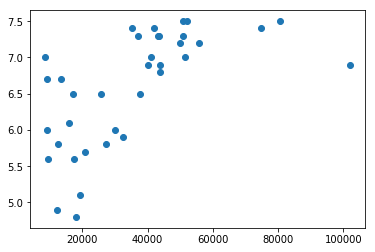

In [42]:
#scatterplot of life satisfaction against gdp
plt.scatter(income,lifesat)
plt.show

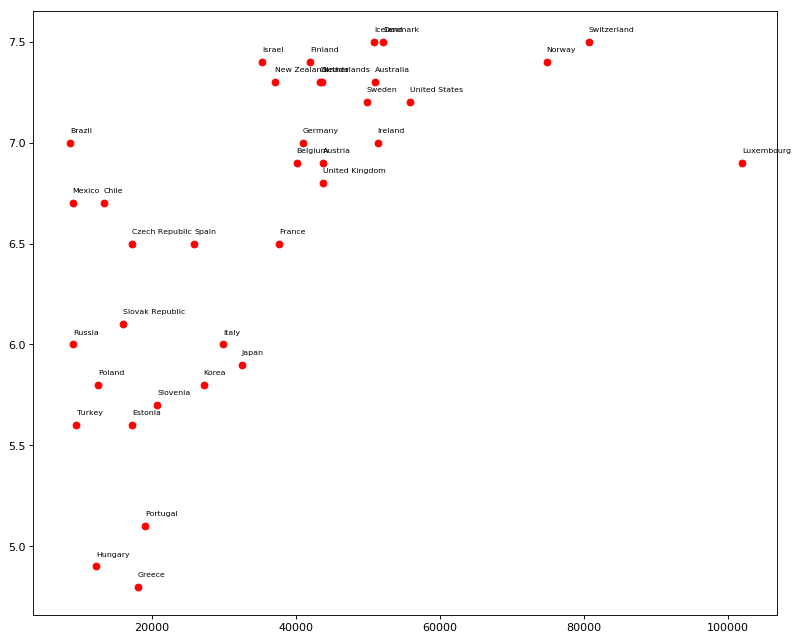

In [43]:
#annotated with country names

from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

for i,type in enumerate(country):
    inc = income[i]
    lif = lifesat[i]
    plt.scatter(inc, lif, color='red')
    plt.text(inc+0.05, lif+0.05, type, fontsize=7)
plt.show()

In [44]:
#now doing the same for time spent on leisure and personal care
data=pd.merge(df1_lei, df2_gdp, on='country')

In [45]:
#merged dataframe with OECD data on leisure and personal care and IMF Data on gdp per capita
data.head()

,location,country,indicator,inequality,unit,value,units,gdp_per_capita
0,AUS,Australia,WL_TNOW,Total,Hours,14.41,U.S. dollars,50961.865
1,AUS,Australia,WL_TNOW,Men,Hours,14.43,U.S. dollars,50961.865
2,AUS,Australia,WL_TNOW,Women,Hours,14.37,U.S. dollars,50961.865
3,AUT,Austria,WL_TNOW,Total,Hours,14.46,U.S. dollars,43724.031
4,AUT,Austria,WL_TNOW,Men,Hours,14.60,U.S. dollars,43724.031


In [46]:
#profile of country with highest number of hours spent on leisure and personal care

data[data['inequality']=='Total'].loc[data[data['inequality']=='Total']['value'].idxmax()]

location                   DNK
country                Denmark
indicator              WL_TNOW
inequality               Total
unit                     Hours
value                    16.06
units             U.S. dollars
gdp_per_capita         52114.2
Name: 15, dtype: object

In [47]:
#profile of country with lowest number of hours spent on leisure and personal care
data[data['inequality']=='Total'].loc[data[data['inequality']=='Total']['value'].idxmin()]

location                   TUR
country                 Turkey
indicator              WL_TNOW
inequality               Total
unit                     Hours
value                    13.42
units             U.S. dollars
gdp_per_capita         9437.37
Name: 81, dtype: object

In [48]:
#turning leisure and personal care hours column into a list
leisure=data[data['inequality']=='Total'].iloc[:, 5].tolist()

In [49]:
#turning gdp per capita column into a list
income=data[data['inequality']=='Total'].iloc[:, 7].tolist()

In [50]:
#turning country column into a list
country=data[data['inequality']=='Total'].iloc[:, 1].tolist()

In [51]:
print(leisure)
print(income)
print(country)

[14.41, 14.46, 15.71, 14.25, 14.98, 16.06, 14.89, 15.33, 15.31, 14.91, 15.04, 14.61, 15.19, 14.98, 14.93, 14.63, 15.12, 13.89, 15.44, 14.87, 15.56, 14.2, 14.95, 14.99, 16.06, 15.11, 14.98, 13.42, 14.83, 14.27, 14.97, 14.41, 14.9, 14.48, 14.97, 14.62]
[50961.865, 43724.031, 40106.632, 43331.961, 17256.918, 52114.165, 41973.988, 37675.006, 40996.511, 18064.288, 12239.894, 50854.583, 51350.744, 29866.581, 32485.545, 27195.197, 101994.093, 9009.28, 43603.115, 37044.891, 74822.106, 12495.334, 19121.592, 15991.736, 25864.721, 49866.266, 80675.308, 9437.372, 43770.688, 55805.204, 8669.998, 13340.905, 17288.083, 35343.336, 9054.914, 20732.482]
['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United Stat

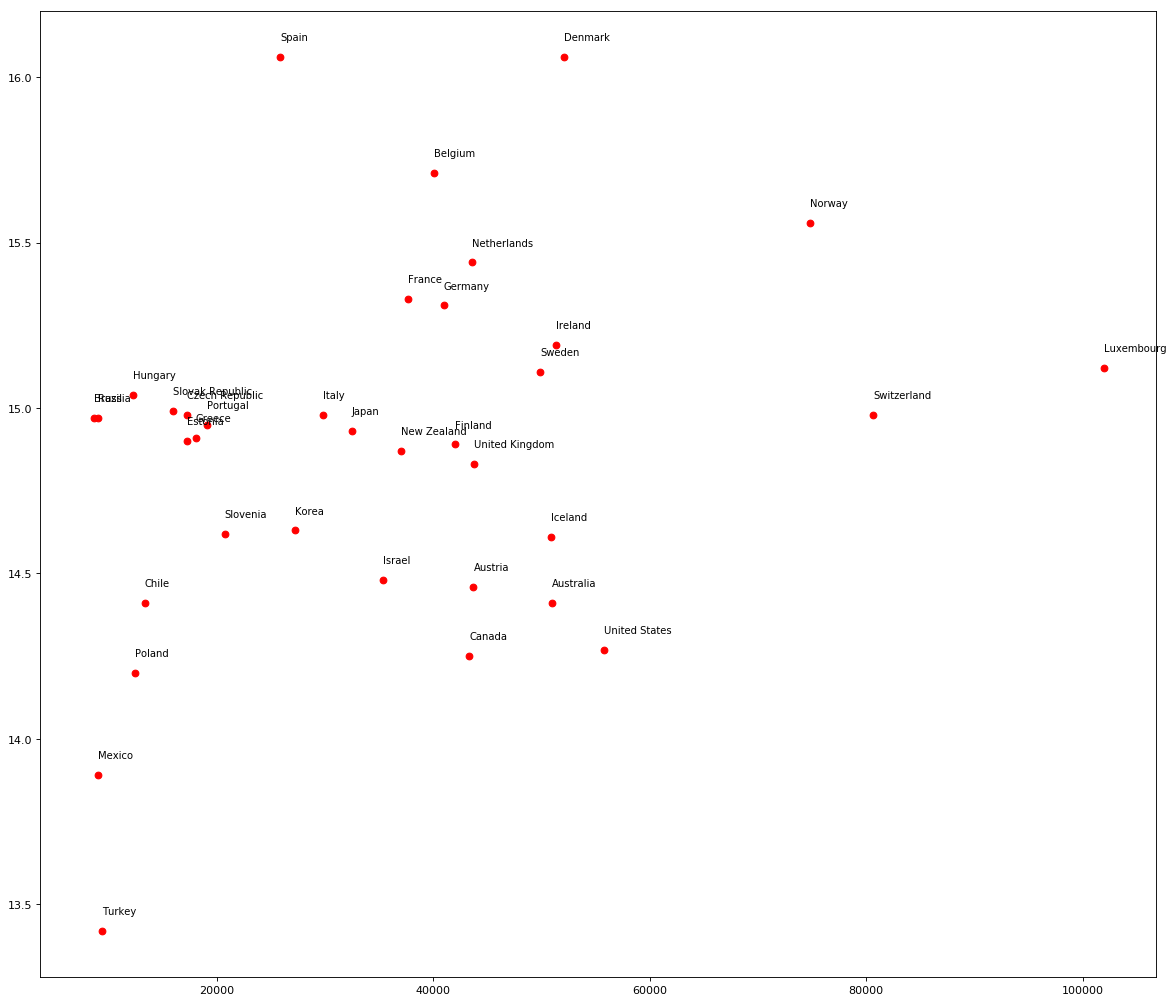

In [52]:
#Scatterplot showing hours spent in leisure and personal care vs. gdp per capita

from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
for i,type in enumerate(country):
    inc = income[i]
    lei = leisure[i]
    plt.scatter(inc, lei, color='red')
    plt.text(inc+0.03, lei+0.05, type, fontsize=9)
plt.show()

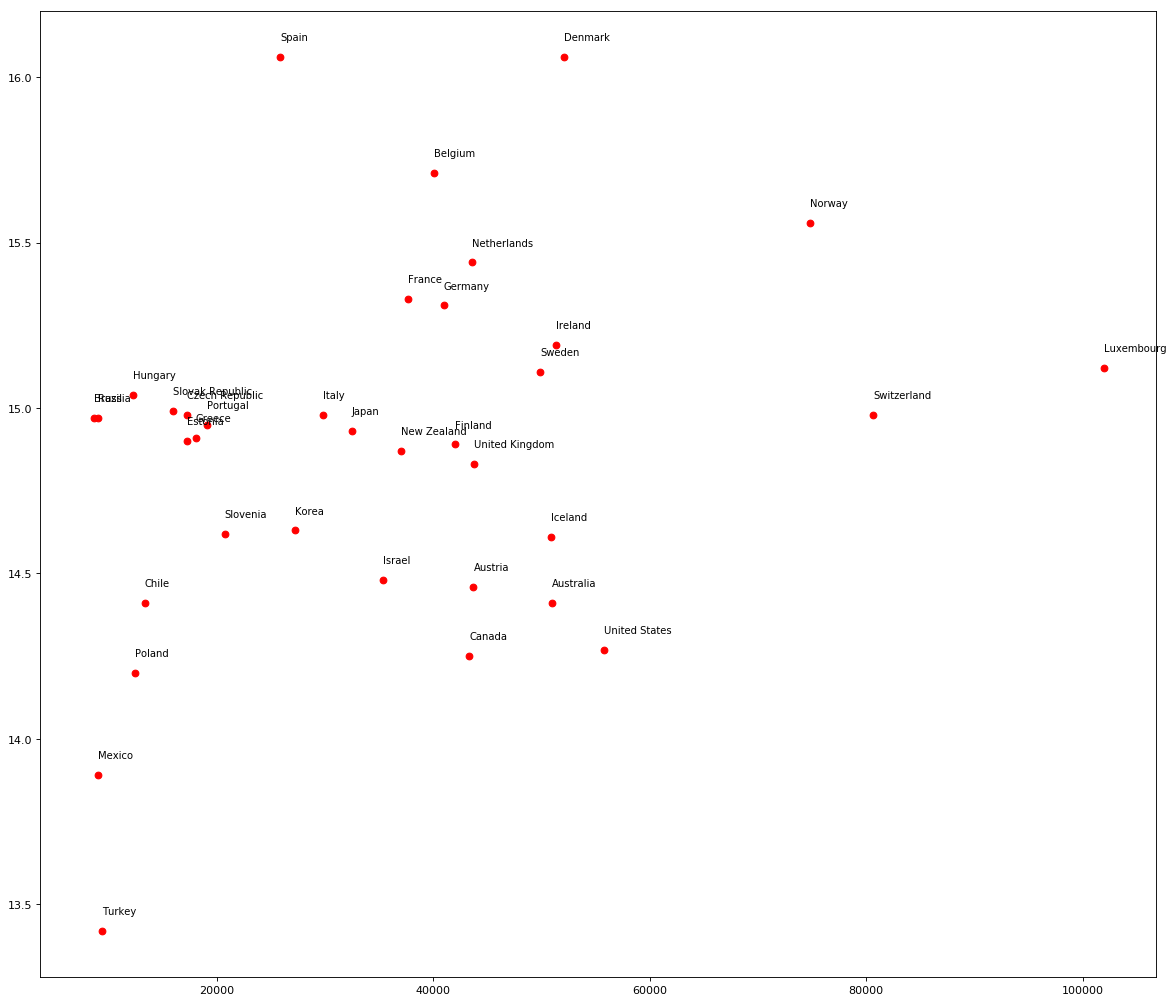

In [53]:
#Scatterplot showing hours spent in leisure and personal care vs. gdp per capita


from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
for i,type in enumerate(country):
    inc = income[i]
    lei = leisure[i]
    plt.scatter(inc, lei, color='red')
    plt.text(inc+0.03, lei+0.05, type, fontsize=9)
plt.plot(inc, lei, color='blue', linewidth=3)
plt.show()


In [54]:
#REGRESSION..? 

In [55]:

x_var = pd.DataFrame(df.gdp_per_capita, columns=["gdp_per_capita"])
y_var = pd.DataFrame(df.value, columns=["value"])

In [56]:
X = x_var["gdp_per_capita"]
y = y_var["value"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     629.0
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           1.64e-59
Time:                        15:55:38   Log-Likelihood:                -442.55
No. Observations:                 174   AIC:                             887.1
Df Residuals:                     173   BIC:                             890.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gdp_per_capita     0.0001   5.67e-06     25.079      0.000       0.000       0.000
==============================================================================
Omnibus:                       43.854   Durbin-Watson:                   0.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.934
Skew:                          -1.199   Prob(JB):                     9.80e-19
Kurtosis:                       5.385   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:

X = x_var["gdp_per_capita"]
y = y_var["value"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out summar
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     68.48
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           3.41e-14
Time:                        15:55:38   Log-Likelihood:                -215.36
No. Observations:                 174   AIC:                             434.7
Df Residuals:                     172   BIC:                             441.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.6915      0.122     46.588      0.000       5.450       5.933
gdp_per_capita  2.448e-05   2.96e-06      8.276      0.000    1.86e-05    3.03e-05
==============================================================================
Omnibus:                      134.727   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2115.075
Skew:                          -2.654   Prob(JB):                         0.00
Kurtosis:                      19.235   Cond. No.                     7.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# FOR LEISURE

In [59]:
x_var1 = pd.DataFrame(data.gdp_per_capita, columns=["gdp_per_capita"])
y_var1 = pd.DataFrame(data.value, columns=["value"])


In [60]:
X = x_var1["gdp_per_capita"]
y = y_var1["value"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model



# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     308.3
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           2.74e-33
Time:                        15:55:38   Log-Likelihood:                -371.52
No. Observations:                 108   AIC:                             745.0
Df Residuals:                     107   BIC:                             747.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gdp_per_capita     0.0003   1.77e-05     17.559      0.000       0.000       0.000
==============================================================================
Omnibus:                       19.725   Durbin-Watson:                   0.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.162
Skew:                          -1.014   Prob(JB):                     5.67e-06
Kurtosis:                       4.120   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X = x_var1["gdp_per_capita"]
y = y_var1["value"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     308.3
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           2.74e-33
Time:                        15:57:26   Log-Likelihood:                -371.52
No. Observations:                 108   AIC:                             745.0
Df Residuals:                     107   BIC:                             747.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gdp_per_capita     0.0003   1.77e-05     17.559      0.000       0.000       0.000
==============================================================================
Omnibus:                       19.725   Durbin-Watson:                   0.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.162
Skew:                          -1.014   Prob(JB):                     5.67e-06
Kurtosis:                       4.120   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Data Definitions

GDP Per Capita 

Gross domestic product per capita, current prices, 2015


Life satisfaction (Subjective well-being) 

Life satisfaction

INDICATOR=SW_LIFS

The indicator considers people's evaluation of their life as a whole. It is a weighted-sum of different
response categories based on people's rates of their current life relative to the best and worst possible
lives for them on a scale from 0 to 10, using the Cantril Ladder (known also as the "Self-Anchoring Striving
Scale")
Unit of measurement: Mean value (Cantril Ladder)
Additional information: Gender inequality (men versus women); Socio-economic inequality
(educational attainment 5/6 ISCED group versus 0/1 ISCED group)
Source: OECD calculations based on Gallup World Poll

Work and Life 
Time devoted to leisure and personal care 

INDICATOR= WL_TNOW

This indicator measures the amount of hours (minutes) per day that, on average, full-time employed
people spend on leisure and on personal care activities. Leisure includes a wide range of indoor and
outdoor activities such as walking and hiking, sports, entertainment and cultural activities, socializing with
friends and family, volunteering, taking a nap, playing games, watching television, using computers,
recreational gardening, etc. Personal care activities include sleeping (but not taking a nap), eating and
drinking, and other household or medical or personal services (hygiene, visits to the doctor, hairdresser,
etc.) consumed by the respondent. Travel time related to personal care is also included. The information is
generally collected through national Time Use Surveys, which involve respondents keeping a diary of their
activities over one or several representative days for a given period.
Unit of measurement: Number of hours (minutes) per day spent on leisure and personal care.
Additional information: Gender inequality (men versus women)
Sources: OECD Time Use Survey database
